In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Set plotting parameters

In [10]:
mpl.rcParams.update({'pdf.fonttype': 42,
                     'ps.fonttype': 42,
                     'xtick.labelsize': 32,
                     'ytick.labelsize': 32, 
                     'axes.labelsize':32,
                     'font.size': 22})

In [3]:
colorMap = {'my_red': '#d62728',
            'my_blue': '#1f77b4',
            'my_green':'#2ca02c',
            'my_orange':'#ff7f0e'}

## Define functions

In [4]:
def isCohesin(string):
    temp = string.upper()
    if "RAD21" in temp:
        return True
    if "SMC3" in temp:
        return True

In [5]:
def isTranscription(string):
    temp = string.upper()
    if "ZNF274" in temp:
        return True
    if "BRF1" in temp:
        return True
    if "BDP1" in temp:
        return True
    if "ZNF143" in temp:
        return True
    if "IRF3" in temp:
        return True  
    if "GABP" in temp:
        return True 
    if "NRSF" in temp:
        return True 
    if "POL2" in temp:
        return True 
    if "MAZ" in temp:
        return True   
    if "ELK1" in temp:
        return True
    return False

## Load in data from LOLA

In [6]:
LolaDir = "/groups/gerlich/experiments/Experiments_005700/005752/LOLA/LOLA_WT/LOLA/"
allbins = pd.read_csv(os.path.join(LolaDir, "allEnrichments.tsv"), sep="\t")

## Filter for Hela datasets

In [7]:
allbins = allbins.loc[[
    True if type(i) is not float and "HELA" in i.upper() else False for i in allbins["cellType"]], :]

## Sort the features by the pValue

In [8]:
sorted_pvalue = allbins
sorted_pvalue.sort_values (by = ['pValueLog'], ascending = False, inplace = True)
my_list = [*range(len(sorted_pvalue), 0, -1)]
sorted_pvalue['EnrRank'] = my_list

## Plot OddsRatio vs pValue

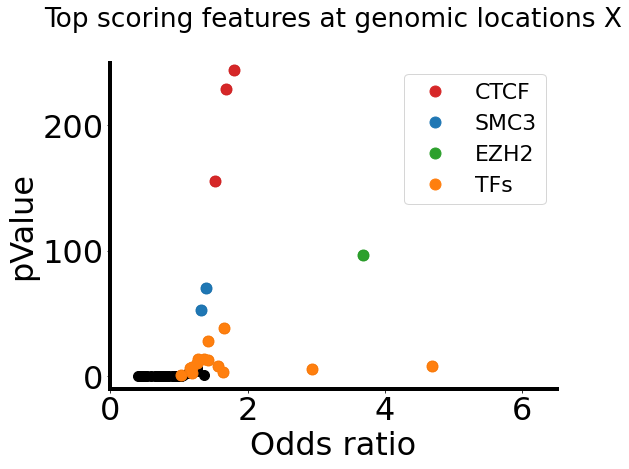

In [11]:
f,ax = plt.subplots(figsize=(8, 6))
dataset = sorted_pvalue
test = dataset.loc[dataset["userSet"] == 'TopTADs', :]
plt.plot(test['oddsRatio'], test["pValueLog"], "o", alpha=1, markersize=10, color = 'black')

ctcf = test.loc[[True if type(i) is not float and "CTCF" in i.upper() else False for i in test["antibody"] ], :]
plt.plot(ctcf['oddsRatio'], ctcf["pValueLog"], "o", alpha=1, markersize=11, color=colorMap['my_red'], label="CTCF")

smc3 = test.loc[[True if type(i) is not float and isCohesin(i) else False for i in test["antibody"] ], :]
plt.plot(smc3['oddsRatio'], smc3["pValueLog"], "o", alpha=1, markersize=11, color=colorMap['my_blue'], label="SMC3")

ezh2 = test.loc[[True if type(i) is not float and "EZH2" in i.upper() else False for i in test["antibody"] ], :]
plt.plot(ezh2['oddsRatio'], ezh2["pValueLog"], "o", alpha=1, markersize=11, color=colorMap['my_green'], label="EZH2")

pol2 = test.loc[[True if type(i) is not float and isTranscription(i) else False for i in test["antibody"] ], :]
plt.plot(pol2['oddsRatio'], pol2["pValueLog"], "o", alpha=1, markersize=11, color=colorMap['my_orange'], label="TFs")

plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel ('Odds ratio')
plt.ylabel ('pValue')
plt.title ('Top scoring features at genomic locations X\n')
plt.xlim (0, 6.5)
plt.ylim (-10, 250)
plt.legend();